In [9]:
# from google.colab import drive
# drive.mount('/content/drive')
#
import os
# os.chdir('/content/drive/My Drive/Deep Fashion Retrieval/deep-fashion-retrieval')
# ! ls
# os.path.isfile(os.path.join(DATASET_BASE, "models", DUMPED_MODEL))

#%#
from in_shop_eval import eval

# results = []
# for n in range(2, 52):
#   results.append(eval(retrieval_top_n=n))
#   print(results)
n=2
eval(retrieval_top_n=n)

Loading feature database...
Loading feature database Done. Time: 0.168 sec
item_id: id_00000001
item_imgs: ['img/WOMEN/Blouses_Shirts/id_00000001/02_1_front.jpg', 'img/WOMEN/Blouses_Shirts/id_00000001/02_2_side.jpg', 'img/WOMEN/Blouses_Shirts/id_00000001/02_3_back.jpg', 'img/WOMEN/Blouses_Shirts/id_00000001/02_4_full.jpg']
result: [('img/WOMEN/Blouses_Shirts/id_00000001/02_2_side.jpg', -0.0), ('img/WOMEN/Blouses_Shirts/id_00002264/02_2_side.jpg', -2.812055263408561)]
Progress: k=1, 0/3985
item_id: id_00000007
item_imgs: ['img/WOMEN/Tees_Tanks/id_00000007/01_1_front.jpg', 'img/WOMEN/Tees_Tanks/id_00000007/01_2_side.jpg', 'img/WOMEN/Tees_Tanks/id_00000007/01_3_back.jpg', 'img/WOMEN/Tees_Tanks/id_00000007/01_4_full.jpg', 'img/WOMEN/Tees_Tanks/id_00000007/01_6_flat.jpg']
result: [('img/WOMEN/Tees_Tanks/id_00000007/01_3_back.jpg', -0.0), ('img/WOMEN/Tees_Tanks/id_00007661/05_1_front.jpg', -2.3782593163204737)]
item_id: id_00000008
item_imgs: ['img/WOMEN/Dresses/id_00000008/02_3_back.jpg', '

KeyboardInterrupt: 

In [8]:
! python feaure_extractor.py

/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
Extracting features from deepfashion dataset.
dump function called with custom: False
0 / 289222
12800 / 289222
25600 / 289222
38400 / 289222
51200 / 289222
64000 / 289222
76800 / 289222
89600 / 289222
102400 / 289222
115200 / 289222
128000 / 289222
140800 / 289222
153600 / 289222
166400 / 289222
179200 / 289222
192000 / 289222
204800 / 289222
217600 / 289222
230400 / 289222
243200 / 289222
256000 / 289222
268800 / 289222
281600 / 289222
0 / 52700
12800 / 52700
25600 / 52700
38400 / 52700
51200 / 52700
Dumped to all_feat.npy, all_color_feat.npy and all_feat.list.


In [12]:
! python feaure_extractor.py --scrapped

/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
num_features: 2048
Loading model model_30_final.pth.tar
Extracting features from scrapped dataset.
dump function called with custom: True
all_list: ['/home/ma02526/ResNet/base/scrapped/jdot/0a0696c7b8f9c84c97e916cafac11a491b2f1230.jpg', '/home/ma02526/ResNet/base/scrapped/jdot/0ad8953502aa99550cb26556560eb64fface5db7.jpg', '/home/ma02526/ResNet/base/scrapped/jdot/0bbbcba93098a2a8cea59e3cc531685efc30e2ed.jpg', '/home/ma02526/ResNet/base/scrapped/jdot/0d615c7c56e76fdf84e9b48191240755f4cc3804.jpg', '/home/ma02526/ResNet/base/scrapped/jdot/0dbc2f21435c0e1cfc8b3f883d6c47df464e4e5b.jpg', '/home/ma02526/ResNet/base/scrapped/jdot/0df6793aa25b13e2e51b70712dc6f74c5315159f.jpg', '/home/ma02526/

Loading model...
num_features: 2048
Loading model model_30_final.pth.tar
Loading model Done. Time: 0.445 sec
Loading feature database...
Loading feature database Done. Time: 0.001 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/hu_men/IMG_20200120_145822.jpg
Custom: True
Extracting image feature Done. Time: 0.178 sec
Doing naive query...
Doing naive query Done. Time: 0.001 sec
Naive query result: [('/home/ma02526/ResNet/base/scrapped/furor/16cb01e23c0a1ceb56c5a2420f52f73500f6e8a9.jpg', -10.980360952339444), ('/home/ma02526/ResNet/base/scrapped/furor/44124f211ba2ccb14b7cce1561acc8ab77803d1a.jpg', -11.60886558932602), ('/home/ma02526/ResNet/base/scrapped/furor/d7bfc057ccf8464c62dbf0974d5929ab960749ca.jpg', -12.94991160695076), ('/home/ma02526/ResNet/base/scrapped/furor/2a15ba9a4940589239d7a4bee45db78abee0a515.jpg', -12.982330387204447), ('/home/ma02526/ResNet/base/scrapped/furor/43ea555297eaf6238e0be04baad797e47c0553e4.jpg', -12.98973449484217)]


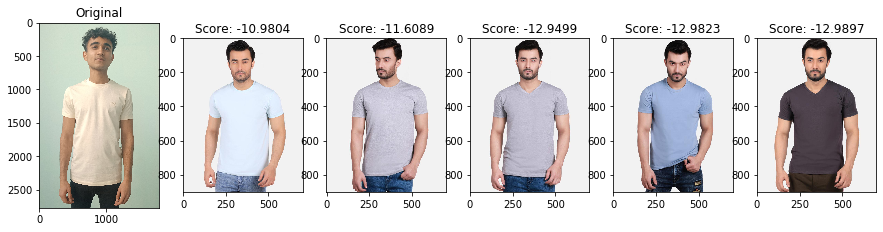

In [7]:
from retrieval import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [10, 5]

# example = "img/Sheer_Pleated-Front_Blouse/img_00000005.jpg"
# example = "img/Abstract-Patterned_Blouse/img_00000004.jpg"
# example = "hu_men/IMG_20200130_152400.jpg"
example = "hu_men/IMG_20200120_145822.jpg"


extractor = load_test_model()

# deep_feats, color_feats, labels = load_feat_db()
deep_feats, color_feats, labels = load_feat_db(custom=True)

# f = dump_single_feature(example, extractor)
f = dump_single_feature(example, extractor, custom=True)

if any(list(map(lambda x: x is None, f))):
    print("Input feature is None")
    exit()

# clf = load_kmeans_model()

result = naive_query(f, deep_feats, color_feats, labels, 5)
# result_kmeans = kmeans_query(clf, f, deep_feats, color_feats, labels, 5)

print("Naive query result:", result)
# print("K-Means query result:", result_kmeans)
visualize(example, result)
# print("Query result:", result_kmeans)
# visualize(example, result_kmeans)

In [0]:
from net import *

INTER_DIM = 512
CATEGORIES = 20
DUMPED_MODEL = "model_10_final.pth.tar"

f_model(freeze_param=False, inter_dim=INTER_DIM, num_classes=CATEGORIES, model_path=DUMPED_MODEL)

Loading model model_10_final.pth.tar


f_model(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64,

In [0]:
from retrieval import *
load_feat_db(custom=True)

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:220: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Loading feature database...
Loading feature database Done. Time: 2.079 sec


(array([[ 0.7963941 , -0.16327731,  0.5005752 , ...,  0.00348724,
         -0.01936189, -0.13899098],
        [ 0.4721783 , -0.14658882,  0.11951138, ...,  0.00857361,
          0.07727434,  0.00837347],
        [-0.37405765,  0.11140244, -0.46851936, ..., -0.18382262,
          0.19089377,  0.1422693 ],
        ...,
        [ 0.03143787,  0.41380578, -0.43167892, ..., -0.1448812 ,
          0.7498995 , -0.5666169 ],
        [ 0.5645923 ,  0.4655726 , -0.21555622, ..., -0.01802251,
          0.5896938 , -0.40011552],
        [ 0.15612942, -0.1948817 ,  0.3831291 , ..., -0.09387633,
         -0.13536413, -0.114146  ]], dtype=float32),
 array([[ 0.91488415,  0.80392444,  1.010124  , ...,  1.6851585 ,
          0.43946248,  0.28979933],
        [ 1.9392041 ,  0.5943625 ,  1.6660447 , ...,  2.416723  ,
          0.79087085,  1.6521537 ],
        [-0.17305714, -1.1172597 , -0.678355  , ..., -1.3056177 ,
         -0.7970065 , -1.334366  ],
        ...,
        [-0.2391158 ,  0.4897408 , -1.4

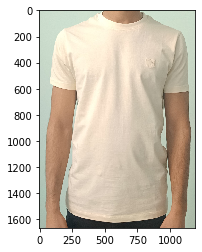

In [0]:
from torchvision import datasets, models, transforms
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

import torch

CROP_SIZE = 224

data_transform_test = transforms.Compose([
    transforms.Resize(CROP_SIZE),
    transforms.CenterCrop(CROP_SIZE)
    # transforms.ToTensor(),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

path = '/content/drive/My Drive/Deep Fashion Retrieval/base/hu_men/IMG_20200120_145822.jpg'

# from read_crop in data.py
with open(path, 'rb') as f:
            with Image.open(f) as img:
                img = img.convert('RGB')
                x1, y1, x2, y2 = 257, 823, 1449, 2488
                if x1 < x2 <= img.size[0] and y1 < y2 <= img.size[1]:
                    img = img.crop((x1, y1, x2, y2))

plt.imshow(img)

In [0]:
def read_lines(path):
        with open(path) as fin:
            lines = fin.readlines()[2:]
            lines = list(filter(lambda x: len(x) > 0, lines))
            pairs = list(map(lambda x: x.strip().split(), lines))
        return pairs

def read_bbox():
        list_bbox = '/content/drive/My Drive/Deep Fashion Retrieval/base/list_bbox_custom.txt'
        pairs = read_lines(list_bbox)
        bbox = dict()
        for k, x1, y1, x2, y2 in pairs:
            bbox[k] = [x1, y1, x2, y2]
        return bbox

# print(read_lines('/content/drive/My Drive/Deep Fashion Retrieval/base/list_bbox_custom'))
print(read_bbox()['IMG_20200120_145822.jpg'])

['257', '823', '1449', '2488']


In [0]:
from in_shop_eval import eval
results = []

for n in range(2, 52):
  results.append(eval(retrieval_top_n=n))
  print(results)

In [0]:
# plot accuracy of top-k in-shop image retrieval
from matplotlib import pyplot as plt

results = [0.6150662251655629, 0.7110927152317881, 0.7677980132450332, 0.8087748344370861, 0.8158112582781457, 0.8385761589403974, 0.8576158940397351, 0.8667218543046358, 0.8758278145695364, 0.882864238410596, 0.8836920529801324, 0.890728476821192, 0.8911423841059603, 0.9052152317880795, 0.9168046357615894, 0.918046357615894, 0.9159768211920529, 0.9122516556291391, 0.921771523178808, 0.9283940397350994, 0.9300496688741722, 0.9279801324503312, 0.9275662251655629, 0.9317052980132451, 0.9346026490066225, 0.9391556291390728, 0.9362582781456954, 0.9416390728476821, 0.9341887417218543, 0.9399834437086093, 0.945364238410596, 0.9375, 0.9437086092715232, 0.9478476821192053, 0.9474337748344371, 0.9486754966887417, 0.9457781456953642, 0.9466059602649006, 0.953228476821192, 0.9461920529801324, 0.9577814569536424, 0.9573675496688742, 0.9466059602649006, 0.9573675496688742, 0.9528145695364238, 0.9561258278145696, 0.9540562913907285, 0.9615066225165563, 0.9577814569536424, 0.9581953642384106]
plt.plot(results)
plt.xlabel('Retrieved images (k=1,...,50)')
plt.ylabel('Retrieval Accuracy')

In [0]:
from in_shop_eval import eval
results = []

for n in range(2, 52):
  results.append(eval(retrieval_top_n=n))
  print(results)

In [0]:
from matplotlib import pyplot as plt

results = [0.6134105960264901, 0.7210264900662252, 0.7644867549668874, 0.8021523178807947, 0.831953642384106, 0.831953642384106, 0.8547185430463576, 0.8621688741721855, 0.8774834437086093, 0.8774834437086093, 0.8820364238410596, 0.894453642384106, 0.8990066225165563, 0.9027317880794702, 0.9048013245033113, 0.9122516556291391, 0.9097682119205298, 0.9151490066225165, 0.9234271523178808, 0.9184602649006622, 0.921771523178808, 0.9275662251655629, 0.9230132450331126, 0.9350165562913907, 0.9366721854304636, 0.9387417218543046, 0.9350165562913907, 0.9445364238410596, 0.9379139072847682, 0.9354304635761589, 0.9395695364238411, 0.9503311258278145, 0.9424668874172185, 0.9445364238410596, 0.9457781456953642, 0.9441225165562914, 0.9548841059602649, 0.9486754966887417, 0.9486754966887417, 0.9470198675496688, 0.9441225165562914, 0.953228476821192, 0.9482615894039735, 0.9552980132450332, 0.9511589403973509, 0.9606788079470199, 0.9552980132450332, 0.9552980132450332, 0.9507450331125827, 0.9627483443708609]
plt.plot(results)
plt.xlabel('Retrieved images (k=1,...,50)')
plt.ylabel('Retrieval Accuracy')